In [18]:
import yfinance as yf
import numpy as np

data = yf.download(["SPY", "AAPL"], start="2020-01-01", end="2022-12-31")

[*********************100%***********************]  2 of 2 completed


In [19]:
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [20]:
def sortino_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sortino ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
		adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sortino_ratio : float

    Note
    -----
    See `<https://www.sunrisecapital.com/wp-content/uploads/2014/06/Futures_
    Mag_Sortino_0213.pdf>`__ for more details.
    """
    
    # compute annualized return
    returns_risk_adj = np.asanyarray(returns - adjustment_factor)
    average_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
    downside_diff = np.clip(returns_risk_adj, np.NINF, 0)
    np.square(downside_diff, out=downside_diff)
    annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)
    
    return average_annual_return / annualized_downside_deviation

In [21]:
# sortino ratio for SPY
sortino_ratio(spy_returns)

0.579829354160304

In [22]:
# sortino ratio for AAPL
sortino_ratio(aapl_returns)

1.0565173371068741

<AxesSubplot:>

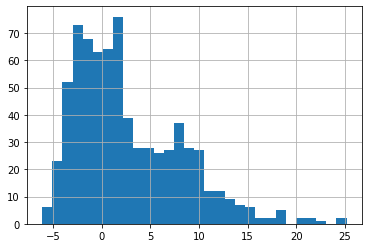

In [23]:
#Use a histogram to visualize the distribution of rolling Sortino ratios. 
#In the case of AAPL, there is a long tail of positive Sortino ratios.
aapl_returns.rolling(30).apply(sortino_ratio).hist(bins=30)

<AxesSubplot:>

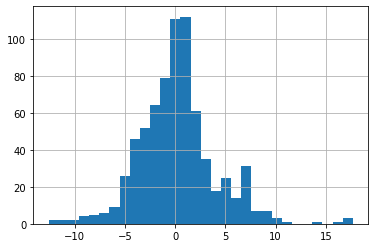

In [24]:
"""
Sortino ratios of AAPL and SPY compare through time. Was AAPL always a better risk adjusted return?
Subtract the SPY Sortino ratio from the AAPL Sortino ratio and plot the result as a histogram.
The histogram looks like two overlapping distributions. 
One distribution is centered around 0 and looks to be skewed left. 
The other distribution looks to center around 5 and be more even. 
This might reflect two different periods of time. 
One where SPY outperformed AAPL and another where AAPL outperformed SPY.
Without the Sortino ratio, you might miss this important information about performance.
"""
(
    aapl_returns.rolling(30).apply(sortino_ratio)
    - spy_returns.rolling(30).apply(sortino_ratio)
).hist(bins=30)